# LeNet on Cifar

This is LeNet (6c-16c-120-84) on Cifar10. Adam algorithm (lr=0.001) with 100 epoches.


#### LeNet

    Total params: 44,426
    Trainable params: 44,426
    Non-trainable params: 0


####  LeNet with 10 intrinsic dim

    Total params: 682,076
    Trainable params: 10
    Non-trainable params: 682,066
    
#### LeNet with 15000 intrinsic dim    
    Total params: 930,167,006
    Trainable params: 15,000
    Non-trainable params: 930,152,006

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

In [10]:
results_dir = '../results/lenet_cifar_l2_0.001'

# dim = [0,250,500,750,1000,1250,1500,1750,1900,1950,2000,2050,2100,2250,2500,3000,4000,5000,5250,5500,5750,6000,6250,6500,6750,7000,7250,7500,7750,8000,8250,8500,8750,9000,9250,9500,9750,10000,15000,20000,25000,30000,35000,40000,45000,50000]

dim = [0,10,50,100,500,750,1000,1250,1500,1750,1900,1950,2000,2050,2100,2250,2500,5000,10000,15000]
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)

dim_ = []            
for f in diary_names: 
    dim_.append( int(f.split('_')[-2]) )         
    
dim = sorted(dim_) 

print dim
            
diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if d == int(f.split('_')[-2]):
            # print "%d is in" % d + f
            diary_names_ordered.append(f)        

# intrinsic update method
Rs, Acc = [], []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
        Acc.append(R[1])
                            
Rs = np.array(Rs)
Acc = np.array(Acc)

# 2.2 construct acc_solved_all and dim_solved_all           

for id_d in range(len(dim)):
    d = dim[id_d]

    r = Rs[id_d,1]
    if d==0:
        test_acc_bl = r        
        # print "Acc goal is: " + str(test_acc_sl) + " for network with depth " + str(ll) + " width "+ str(w)
    else:
        test_acc = r
        if test_acc>test_acc_bl*0.9:
            acc_solved=test_acc
            dim_solved=d
            print "Intrinsic dim is: " + str(d) + " for LeNet"
            # print "\n"
            break

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 1900, 1950, 2000, 2050, 2100, 2250, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
0 dim:
(4.97572, 0.5796, 0.112174, 0.96086, 184.707)

250 dim:
(1.90655, 0.318, 1.90521, 0.31826, 212.042)

500 dim:
(1.67792, 0.3904, 1.67412, 0.39842, 217.218)

750 dim:
(1.55566, 0.4478, 1.54047, 0.45106, 217.959)

1000 dim:
(1.51612, 0.4622, 1.48594, 0.47296, 208.912)

1250 dim:
(1.45248, 0.4857, 1.42595, 0.49468, 209.329)

1500 dim:
(1.44311, 0.4804, 1.40013, 0.49982, 250.536)

1750 dim:
(1.37514, 0.5181, 1.31392, 0.53806, 211.105)

1900 dim:
(1.39473, 0.5025, 1.33424, 0.52604, 223.799)

1950 dim:
(1.37309, 0.5108, 1.32478, 0.5303, 222.919)

2000 dim:
(1.35499, 0.514, 1.29992, 0.53972, 231.783)

2050 dim:
(1.3594, 0.5185, 1.30346, 0.54162, 231.263)

2100 dim:
(1.36086, 0.5206, 1.29395, 0.54252, 229.522)

2250 dim:
(1.32558, 0.528, 1.27493, 0.5487, 222.882)

2500 dim:
(1.32359, 0.5344, 1.26351, 0.55712, 252.905)

5000 dim:
(1.2371

In [8]:
print ','.join(['[%i, %s]' % (dim[n], Acc[n]) for n in xrange(len(Acc))])


[0, 0.5796],[250, 0.318],[500, 0.3904],[750, 0.4478],[1000, 0.4622],[1250, 0.4857],[1500, 0.4804],[1750, 0.5181],[1900, 0.5025],[1950, 0.5108],[2000, 0.514],[2050, 0.5185],[2100, 0.5206],[2250, 0.528],[2500, 0.5344],[5000, 0.5661],[10000, 0.6081],[15000, 0.6072],[20000, 0.6161],[25000, 0.6163],[30000, 0.595],[35000, 0.609],[40000, 0.5856],[45000, 0.5864],[50000, 0.5696]


## Performance comparison with Baseline

"Baseline method" indicates optimization in the parameter space.

The proposed method first embeds parameters into the intrinisic space (via orthogonal matrix), and optimization is the new space.

The dimension of intrinsic space indicates the degree of freedom in the weights of neural nets.

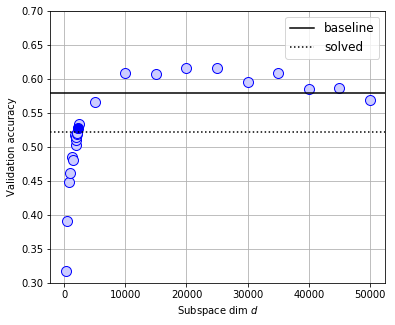

In [5]:
fig, ax = subplots(figsize=(6,5) )
  
font = {'size'   : 12}
matplotlib.rc('font', **font)


plot(dim[1:], Rs[1:,1], 'o', mec='b', mfc=(.8,.8,1), ms=10)
plot(dim_solved, acc_solved, 'o', mec='b', mfc='b', ms=10)
axhline(Rs[0,1], ls='-', color='k',label='baseline')
axhline(Rs[0,1] * .9, ls=':', color='k',label='solved')
plt.legend()
ax.set_xlabel('Subspace dim $d$')
ax.set_ylabel('Validation accuracy')

# ax.set_title('width %d, depth %d' %(width[i], depth[j]))
plt.grid()
ax.set_ylim([0.3,0.7])
        
fig.savefig("figs/lenet_cifar_dim.pdf", bbox_inches='tight')

The above figure show that updating in the intrinsic space can prevent overfitting.


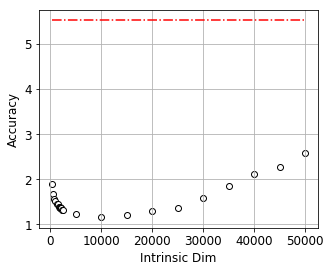

In [6]:
nn = len(Rs)-1
fig, ax = subplots(figsize=(5,4) )
                  
plt.scatter(dim[1:], Rs[1:,0], edgecolor="k", facecolor="w" )
ax.plot(dim[1:], Rs[0,0]*np.ones(nn)/0.9,'r-.', label="Testing: baseline")
ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Accuracy')
plt.grid()
# ax.set_ylim([-0.1,1.1])

The above figure show that updating in the intrinsic space can prevent overfitting.

In [21]:
results_dir = '../results/lrb_lenet_cifar' 
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)

print diary_names            
dim_ = []            
for f in diary_names: 
    dim_.append( int(f.split('/')[-2].split('_')[-1]) )         
    
dim = sorted(dim_) 

print dim
            
diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if d ==  int(f.split('/')[-2].split('_')[-1]):
            # print "%d is in" % d + f
            diary_names_ordered.append(f)        

# intrinsic update method
Rs, Acc = [], []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        # print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
        Acc.append(R[1])
                            
Rs = np.array(Rs)
Acc = np.array(Acc)

print Rs.shape

# 2.2 construct acc_solved_all and dim_solved_all           

for id_d in range(len(dim)):
    d = dim[id_d]

    r = Rs[id_d,1]
    if d==0:
        test_acc_bl = r        
        # print "Acc goal is: " + str(test_acc_sl) + " for network with depth " + str(ll) + " width "+ str(w)
    else:
        test_acc = r
        if test_acc>test_acc_bl*0.9:
            acc_solved=test_acc
            dim_solved=d
            print "Intrinsic dim is: " + str(d) + " for LeNet"
            # print "\n"
            break

['../results/lrb_lenet_cifar/170818_014656_6c7951e_lrb_lenet_cifar_dir_0/diary', '../results/lrb_lenet_cifar/170820_212952_6c7951e_lrb_lenet_cifar_lrb_18000/diary', '../results/lrb_lenet_cifar/170820_213003_6c7951e_lrb_lenet_cifar_lrb_17000/diary', '../results/lrb_lenet_cifar/170820_205254_6c7951e_lrb_lenet_cifar_lrb_10/diary', '../results/lrb_lenet_cifar/170818_021257_6c7951e_lrb_lenet_cifar_lrb_100000/diary', '../results/lrb_lenet_cifar/170820_204628_6c7951e_lrb_lenet_cifar_lrb_1500/diary', '../results/lrb_lenet_cifar/170820_204627_6c7951e_lrb_lenet_cifar_lrb_2000/diary', '../results/lrb_lenet_cifar/170820_205619_6c7951e_lrb_lenet_cifar_lrb_100/diary', '../results/lrb_lenet_cifar/170820_214922_6c7951e_lrb_lenet_cifar_lrb_25000/diary', '../results/lrb_lenet_cifar/170820_204647_6c7951e_lrb_lenet_cifar_lrb_4000/diary', '../results/lrb_lenet_cifar/170820_205142_6c7951e_lrb_lenet_cifar_lrb_50/diary', '../results/lrb_lenet_cifar/170818_030211_6c7951e_lrb_lenet_cifar_lrb_150000/diary', '../

In [22]:
print ','.join(['[%i, %s]' % (dim[n], Acc[n]) for n in xrange(len(Acc))])


[0, 0.6469],[10, 0.1176],[50, 0.1026],[100, 0.1049],[250, 0.1126],[500, 0.1674],[750, 0.2198],[1000, 0.2655],[1250, 0.2956],[1500, 0.3113],[1750, 0.3207],[2000, 0.3613],[2500, 0.333],[3000, 0.3506],[4000, 0.3959],[5000, 0.4146],[10000, 0.5138],[15000, 0.5377],[16000, 0.5384],[17000, 0.5239],[18000, 0.5364],[19000, 0.5355],[20000, 0.5514],[21000, 0.5423],[25000, 0.5521],[30000, 0.5752],[35000, 0.5747],[40000, 0.5881],[45000, 0.6003],[50000, 0.6058],[100000, 0.5749],[150000, 0.1627]


In [54]:
""" Extract final stats from resman's diary file"""
def extract_num(lines0, is_reg=False):

    if is_reg:
        valid_loss_str     = lines0[-5]
        valid_accuracy_str = lines0[-6]
        train_loss_str     = lines0[-8]
        train_accuracy_str = lines0[-9]
        average_time_str   = lines0[-10]        
        run_time_str       = lines0[-11]   
        
    else: 
        valid_loss_str     = lines0[-6]
        valid_accuracy_str = lines0[-7]
        train_loss_str     = lines0[-10]
        train_accuracy_str = lines0[-11]
        average_time_str   = lines0[-12]        
        run_time_str       = lines0[-13]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

""" Extract number of total parameters for each net config from resman's diary file"""
def parse_num_params(lines0):
    line_str = ''.join(lines0)
    idx = line_str.find("Total params")
    param_str = line_str[idx+14:idx+14+20] # 14 is the length of string "Total params: "
    param_num = param_str.split("\n")[0]
    return int(locale.atof(param_num))

def extract_perf_dim(results_dir):
    # Dim: subspace dim
    # Acc: Accuracy
    
    # filename list of diary
    diary_names = []
    for subdir, dirs, files in os.walk(results_dir):
        for f in files:
            if f == 'diary':
                fname = os.path.join(subdir, f)
                diary_names.append(fname)

    # print diary_names   

    dim = []
    for f in diary_names:
        # print f
        tmp_str = f.split('/')[-2]
        if tmp_str.split('_')[-3]=='LeNet':
            d = int(tmp_str.split('_')[-2])
            dim.append(d)

    dim = list(set(dim))
    dim = sorted(dim)  

    # print dim

    diary_names_ordered = []
    for d in dim:
        for f in diary_names:
            if '_LeNet_'+str(d)+'_' in f and f.split('_')[-3]=='LeNet':
                # print "%d is in" % d + f
                diary_names_ordered.append(f)           
    # print diary_names_ordered
    # intrinsic update method
    Dim= []
    Acc = []

    for fname in diary_names_ordered:
        tmp_str = fname.split('/')[-2]
        d = int(tmp_str.split('_')[-2])
        with open(fname,'r') as ff:
            lines0 = ff.readlines()

            try: 
                r = extract_num(lines0,False)[1]
                # print "%d dim:\n"% d + str(r) + "\n"
                Dim.append(d)
                Acc.append(r)

            except ValueError:
                print "%d dim:\n"%d + "Error \n"
                pass

    return Dim, Acc


In [58]:
def plot_perf_dim(Dim, Acc, Cx=None):
    fig, ax = subplots(figsize=(6,5) )

    font = {'size'   : 12}
    matplotlib.rc('font', **font)

    for i in range(len(Dim)):
        if Cx == None:
            if Acc[i]>Acc[0]*0.9 and i>10:
                print "d_{int}="+str(Dim[i]) + ', acc:' + str(Acc[i])
                break
        else: 
            if Acc[i]>Cx and i>10:
                print "d_{int}="+str(Dim[i]) + ', acc:' + str(Acc[i])
                break
                
            
    
    plot(Dim[4:], Acc[4:], 'o', mec='b', mfc=(.8,.8,1), ms=10)
    plot(Dim[i], Acc[i], 'o', mec='b', mfc='b', ms=10)
    axhline(Acc[0], ls='-', color='k',label='baseline')
    axhline(Acc[0] * .9, ls=':', color='k',label='solved')
    plt.legend()
    ax.set_xlabel('Subspace dimension $d$')
    ax.set_ylabel('Validation accuracy')

    # ax.set_title('Cifar: Untied_LeNet' )
    plt.grid()
    ax.set_ylim([0.0,1.01])
    # fig.savefig("figs/fnn_mnistPL_W"+str(width[i])+"_L"+str(depth[j])+".pdf", bbox_inches='tight')


d_{int}=1750, acc:0.5015


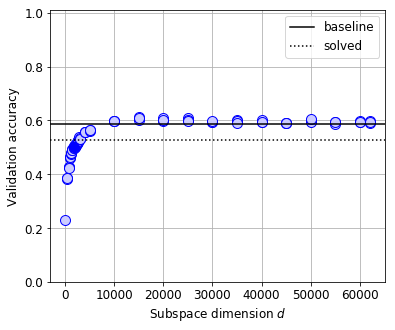

In [59]:
results_root = '/home/users/chunyuan.li/public_results/chun/'


exp_folder = 'results_cifar_LeNet'
results_dir = results_root + exp_folder
Dim, Acc= extract_perf_dim(results_dir)
# print Dim, Acc
plot_perf_dim(Dim, Acc, 0.5)

In [61]:
print ','.join(['[%i, %s]' % (Dim[n], Acc[n]) for n in xrange(len(Dim))])

[0, 0.5875],[0, 0.5754],[0, 0.589],[100, 0.2294],[100, 0.2295],[500, 0.3844],[500, 0.3832],[500, 0.3843],[750, 0.4264],[750, 0.4251],[750, 0.423],[1000, 0.4642],[1000, 0.4607],[1000, 0.4633],[1250, 0.4766],[1250, 0.4773],[1250, 0.4786],[1500, 0.4899],[1500, 0.4922],[1500, 0.4891],[1750, 0.5015],[1750, 0.5021],[1750, 0.5035],[1900, 0.497],[1900, 0.4996],[1900, 0.4979],[1950, 0.5034],[1950, 0.5022],[1950, 0.504],[2000, 0.506],[2000, 0.5057],[2000, 0.5037],[2050, 0.5038],[2050, 0.4999],[2050, 0.4999],[2100, 0.5095],[2100, 0.5087],[2100, 0.5088],[2250, 0.5084],[2250, 0.5076],[2250, 0.5072],[2400, 0.5112],[2400, 0.5165],[2400, 0.5146],[2500, 0.5173],[2500, 0.5184],[2500, 0.516],[2600, 0.5223],[2600, 0.5199],[2600, 0.5205],[2750, 0.5229],[2750, 0.5253],[2750, 0.5247],[2900, 0.533],[2900, 0.5317],[2900, 0.5375],[3000, 0.5324],[3000, 0.5327],[3000, 0.5316],[4000, 0.5578],[4000, 0.5572],[4000, 0.5565],[5000, 0.5599],[5000, 0.5646],[5000, 0.5629],[10000, 0.5967],[10000, 0.5987],[10000, 0.5993],[